<a href="https://colab.research.google.com/github/TheMathAI/MATH208_PROJECT/blob/main/MATH_208_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# library
library(tidyverse)
library(ggplot2)

In [31]:
# taking data from github to a dataframe
cpu_gpu_data <- read.csv("https://raw.githubusercontent.com/TheMathAI/MATH208_PROJECT/main/chip_dataset.csv")

names(cpu_gpu_data)

[1] "ID"                    "Product"               "Type"                 
 [4] "Release.Date"          "Process.Size..nm."     "TDP..W."              
 [7] "Die.Size..mm.2."       "Transistors..million." "Freq..MHz."           
[10] "Foundry"               "Vendor"                "FP16.GFLOPS"          
[13] "FP32.GFLOPS"           "FP64.GFLOPS"

In [32]:
# replacing columns names to get initial columns names
colnames(cpu_gpu_data) <- c('ID', 'Product', 'Type', 'Release_Date', 'Process_Size_(nm)', 'TDP_(W)', 'Die_Size_(mm_square)', 'Transistors_(million)', 'Freq_(MHz)', 'Foundry', 'Vendor', 'FP16_GFLOPS', 'FP32_GFLOPS', 'FP64_GFLOPD')
names(cpu_gpu_data)

[1] "ID"                    "Product"               "Type"                 
 [4] "Release_Date"          "Process_Size_(nm)"     "TDP_(W)"              
 [7] "Die_Size_(mm_square)"  "Transistors_(million)" "Freq_(MHz)"           
[10] "Foundry"               "Vendor"                "FP16_GFLOPS"          
[13] "FP32_GFLOPS"           "FP64_GFLOPD"

In [33]:
head(cpu_gpu_data)

,ID,Product,Type,Release_Date,Process_Size_(nm),TDP_(W),Die_Size_(mm_square),Transistors_(million),Freq_(MHz),Foundry,Vendor,FP16_GFLOPS,FP32_GFLOPS,FP64_GFLOPD
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,0,AMD Athlon 64 3500+,CPU,2007-02-20,65,45,77,122,2200,Unknown,AMD,NA,NA,NA
2,1,AMD Athlon 200GE,CPU,2018-09-06,14,35,192,4800,3200,Unknown,AMD,NA,NA,NA
3,2,Intel Core i5-1145G7,CPU,2020-09-02,10,28,NA,NA,2600,Intel,Intel,NA,NA,NA
4,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22,80,160,1400,1800,Intel,Intel,NA,NA,NA
5,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45,125,258,758,3700,Unknown,AMD,NA,NA,NA
6,5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22,95,160,1400,2400,Intel,Intel,NA,NA,NA


In [34]:
# remove all rows with NA values between the column 5 and 9 inclunding 5,9.
cpu_gpu_data_no_NA <- cpu_gpu_data[complete.cases(cpu_gpu_data[ , 5:9]),]

In [35]:
# Count by group (CPU and GPU) with proportion
cpu_gpu_data_count <- cpu_gpu_data_no_NA %>% group_by(Type) %>% summarise(count=n()) %>%
 mutate(prop=count/sum(count)) %>% arrange(desc(count))

cpu_gpu_data_count

Type,count,prop
<chr>,<int>,<dbl>
GPU,1879,0.5490941
CPU,1543,0.4509059


In [ ]:
# It contains min, max, mean, median, sd, IQR, Q1 and Q3. Feel free to add 
#other functions that would give us more information on the data
summary_cpu_gpu <- cpu_gpu_data_no_NA %>% group_by(Type) %>% select(Type, 'Process_Size_(nm)', 'TDP_(W)', 'Die_Size_(mm_square)', 'Transistors_(million)', 'Freq_(MHz)') %>%
  summarise_all(list(Min=min, Max=max,Avg=mean, Med=median, Sd=sd, iqr=IQR, Q1=~quantile(.,probs=0.25), Q3=~quantile(.,probs=0.75))) %>% 
  pivot_longer(cols=starts_with(c('Process','TDP','Die','Transistors','Freq')), names_to = "Measure", values_drop_na = TRUE)

summary_cpu_gpu

In [ ]:
# pivoting wider to compare more easily the difference between CPU and GPU
summary_cpu_gpu %>% pivot_wider(names_from = Type, values_from = value)

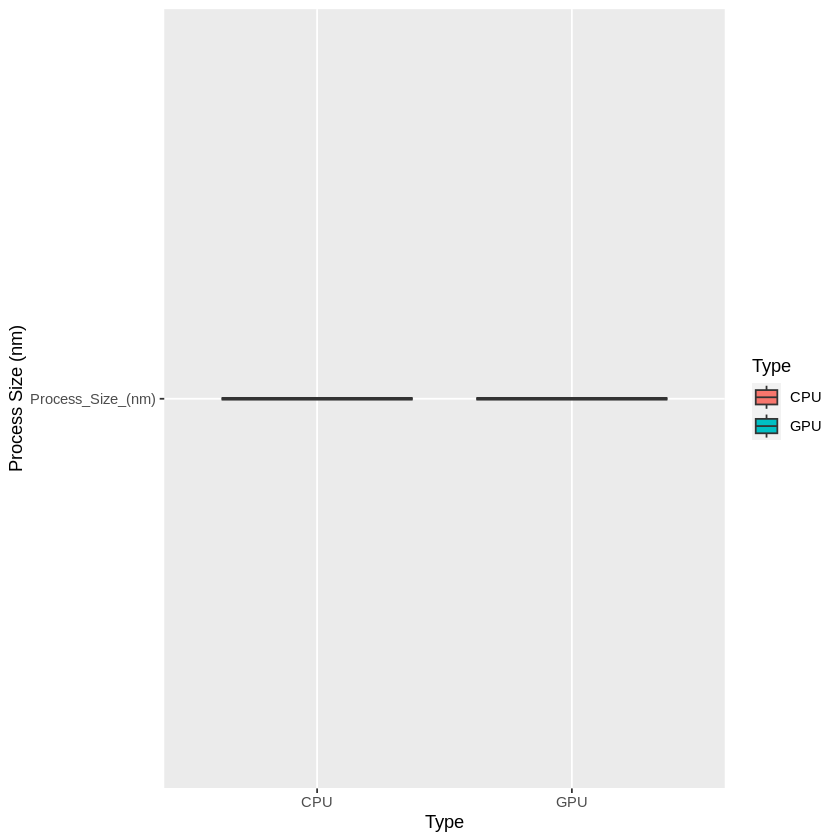

In [41]:
# doesn't make sense needs to change it
ggplot(cpu_gpu_data_no_NA,aes(x=Type,y='Process_Size_(nm)',fill=Type)) +
stat_boxplot(geom="errorbar",width=0.5) + geom_boxplot() +
ylab("Process Size (nm)")